In [15]:
# All imports
from regression_analysis.utils import create_data_franke, create_plots, basis_functionality
from regression_analysis.fit_model import ordinary_least_squares

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
%load_ext autoreload
%autoreload 2

# Ordinary Least Squares

The Ordinary Least Squares (OLS) method is used to estimate the unknown paramters in a linear regression model. 
Suppose our data is made of $n$ obeservations which are given by $(x_i, y_i)_{i=0}^{n-1}$ where $x_i$ is a feature and $y_0$ is the ouput or target. In a linear regressiion model the response variable $y$ is defined as: $$y_i:= \beta_1 x_{i,1}+\beta_2 x_{i,2}+\dots+\beta_p x_{i,p}+\epsilon_i.$$ This can also be written in matrix notation as $y:=X\beta+\epsilon.$ $X$ is called the design matrix. 

The aim of OLS is to find the optimal $\beta_{OLS}$ which minimizes the cost function $$C_{OLS}(\beta):=\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\sum_{j=0}^{p-1}x_{ij}\beta_j)^2.$$ This $\beta_{OLS}$ can be calculated as follows $$\beta_{OLS}=\underset{\beta \in R^p}{\arg\max}\frac{1}{n}(y-X\beta)^T(y-X\beta)=(X^TX)^{-1}X^Ty.$$



## Data

The Franke function is used to generate the data:

$$y(x_1,x_2) = \frac{3}{4}\exp{(-\frac{(9x_1-2)^2}{4}-\frac{(9x_2-2)^2}{4})} + \frac{3}{4}\exp{(-\frac{(9x_1+1)^2}{49}-\frac{(9x_2+1)}{10})} + \frac{1}{2}\exp{(-\frac{(9x_1-7)^2}{4}-\frac{(9x_2-3)^2}{4})} - \frac{1}{5}\exp{(-(9x_1-4)^2-(9x_2-7)^2 )}$$

and $x_1, x_2 \in [0,1]$. This is a two-dimensional function. It is often used as a test function for interpolation and fitting problems.

<IPython.core.display.Javascript object>


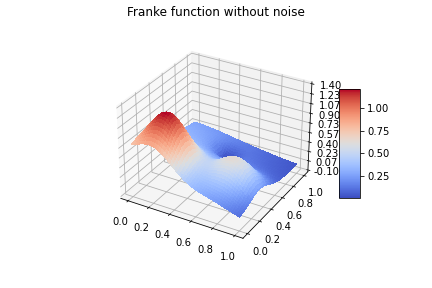

<IPython.core.display.Javascript object>


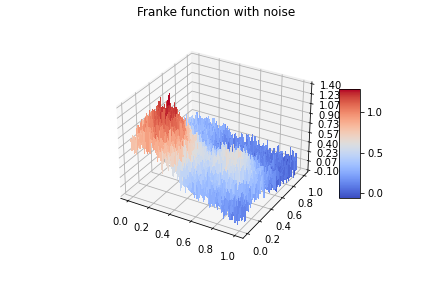

In [22]:
%matplotlib notebook

# Generate data without noise
x1, x2, y = create_data_franke.generate_data(noisy=False, points=100)

# Generate data with noise
_, _, y_noise = create_data_franke.generate_data(noisy=True, noise_variance=0.1, points=100)

# Plot data
create_plots.make_3d_surface_plot(x1, x2, y, title="Franke function without noise")
create_plots.make_3d_surface_plot(x1, x2, y_noise, title="Franke function with noise")

## Calculate Ordinary Least Squares for order 1
We want to find the best $\beta_{OLS}$ such that $\tilde{y}=X\beta_{OLS}$ where $X$ is the design matrix. $X$'s columns are different combination of the input variables $x_1$ and $x_2$. 
For example when we want to fit a plynomial with the order 2 to $y$ the design matrix has the columns: $1, x, y, xy, x^2, y^2$. 

The following plot shows the fit of a ploynomial with order 1 to the Franke function data. Just by inspecting the plots we can clearly see that this is not a good fit.

[ 0.98860268 -0.66594379 -0.50052864]


<IPython.core.display.Javascript object>


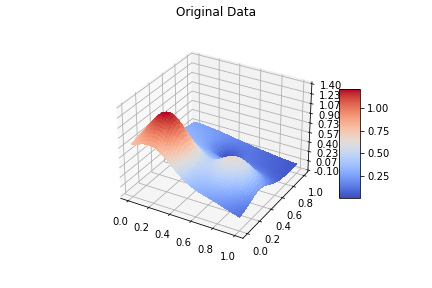

<IPython.core.display.Javascript object>


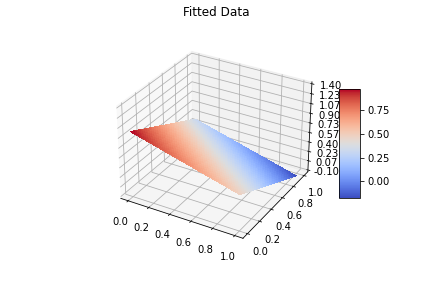

In [13]:
# Calculate beta and the response variable y_tilde for ordinary least squares.
beta_OLS, y_tilde_OLS = ordinary_least_squares.calculate_OLS(x1, x2, y, order=1)

# Plot y_tilde
create_plots.make_3d_surface_plot(x1, x2, y, title="Original Data")
create_plots.make_3d_surface_plot(x1, x2, y_tilde_OLS, title="Fitted Data")

Usually we would not look at the plot to decide if the model is good fit. Instead we calculate:
1. **mean squared error (MSE)**: 
The MSE gives the average square difference bewteen the estimated values and the actual value. It is defined as $$MSE:=\frac{1}{n}\sum_{i=0}^{n-1}(z-\tilde{y})^2.$$
2. **$R^2$ score**: The $R^2$ score a measure of how well the model fits the data points. A $R^2$ score of 1 means that the model fits the data perfectly. It is defined as $$R^2:=1-\frac{\sum_{i=0}^{n-1}(y_i-\tilde{y})^2}{\sum_{i=0}^{n-1}(y_i-\bar{y})^2}$$ where $\bar{y}:=\frac{1}{n}\sum_{i=0}^{n-1}y_i$ is the mean value. 

In [16]:
# Calculate error evaluaters for the test dataset
error_class = basis_functionality.Error_Measures(y, y_tilde_OLS)
MSE = error_class.mean_squared_error()
R2 = error_class.r2_score()

print("MSE:" + str(MSE))
print("R2:" + str(R2))

MSE:0.023352654015282418
R2:0.7164398072188657


## How to choose the order of the fitted polynomial

As we have seen fitting a model of order 1 to the Franke data. Therefore, we want to find out which order makes more sense. Moreover, we split the data into testing and training data and the data is scaled using min-max normalization. 

<IPython.core.display.Javascript object>


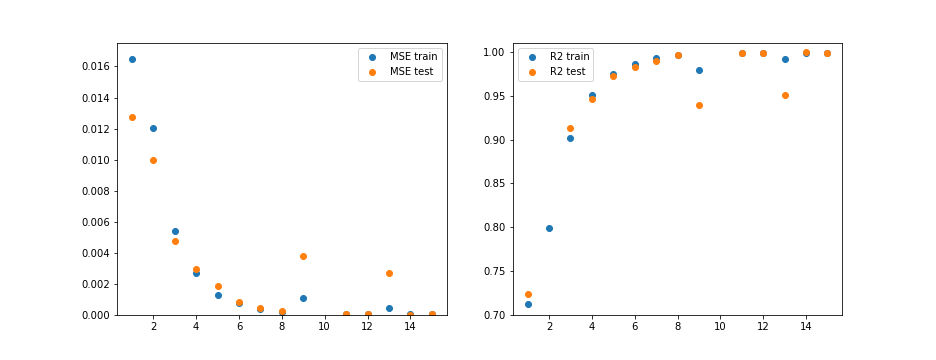

In [46]:
# Fit model for different polynomial orders
max_order = 15
orders = range(1, max_order+1)

MSE_train = np.empty([1, max_order])
R2_train = np.empty([1, max_order])
MSE_test = np.empty([1, max_order])
R2_test = np.empty([1, max_order])

for i, order in enumerate(orders):
    MSE_train[:, i], MSE_test[:, i], R2_train[:, i], R2_test[:, i] = ordinary_least_squares.perform_OLS(x1, x2, y, order,
                                                                                                        train_frac=0.8)
# Plot errors
axes_1 = np.array(orders)

args_MSE = (MSE_train, MSE_test)
axes_MSE_2 = np.concatenate(args_MSE, axis=0)

args_R2 = (R2_train, R2_test)
axes_R2_2 = np.concatenate(args_R2, axis=0)

line_lab_MSE = ['MSE train', 'MSE test']
line_lab_R2 = ['R2 train', 'R2 test']

fig_errors = plt.figure(figsize=(13,5))
fig_errors.tight_layout()
create_plots.make_multi_line_plot(
    axes_1, axes_MSE_2, line_lab_MSE, fig_errors, 121, [0, 0.0175])
create_plots.make_multi_line_plot(
    axes_1, axes_R2_2, line_lab_R2, fig_errors, 122, [0.7, 1.01])

plt.show()

We see clearly that for an order higher than 8 either the fit gets worse or stays nearly the same. Therefore, in the following we will consider orders up to 8.

## Resampling algorithms

In [5]:
# Fit model for different polynomial
max_order = 5
orders = range(1, max_order+1)

MSE_train = np.empty([1, max_order])
R2_train = np.empty([1, max_order])
MSE_test = np.empty([1, max_order])
R2_test = np.empty([1, max_order])

MSE_train_c = np.empty([1, max_order])
R2_train_c = np.empty([1, max_order])
MSE_test_c = np.empty([1, max_order])
R2_test_c = np.empty([1, max_order])

MSE_train_b = np.empty([1, max_order])
R2_train_b = np.empty([1, max_order])
MSE_test_b = np.empty([1, max_order])
R2_test_b = np.empty([1, max_order])

for i, order in enumerate(orders):
    MSE_train[:, i], MSE_test[:, i], R2_train[:, i], R2_test[:, i] = ordinary_least_squares.perform_OLS(x1, x2, y, order,
                                                                                                        train_frac=0.8)
    MSE_train_c[:, i], MSE_test_c[:, i], R2_train_c[:, i], R2_test_c[:, i] = ordinary_least_squares.perform_OLS_cross_val(x1,
                                                                                                                          x2,
                                                                                                                          y,
                                                                                                                          order,
                                                                                                                          num_fold=5)
    MSE_train_b[:, i], MSE_test_b[:, i], R2_train_b[:, i], R2_test_b[:, i] = ordinary_least_squares.perform_OLS_bootstrap(x1,
                                                                                                                          x2,
                                                                                                                          y,
                                                                                                                          order,
                                                                                                                          train_frac=0.8,
                                                                                                                          num_boot=5)

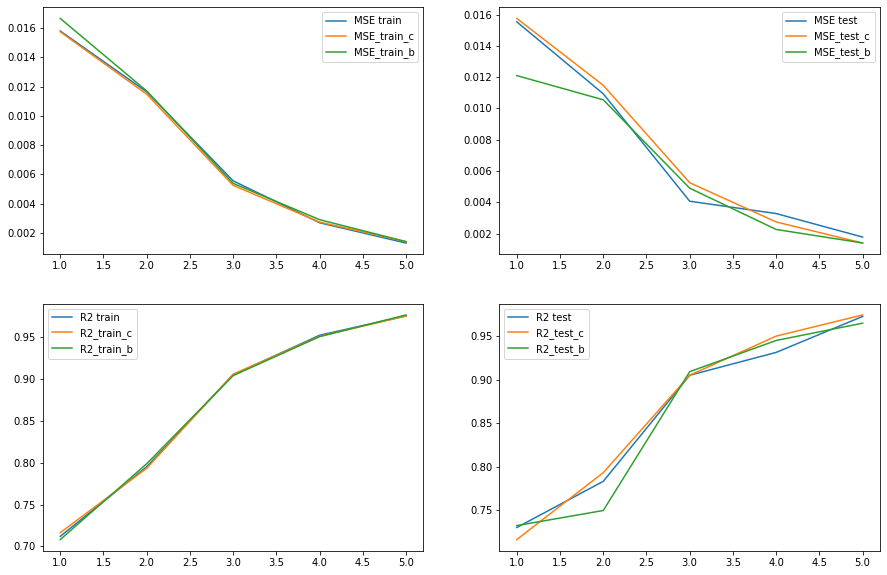

In [6]:
%matplotlib inline
# Plot errors
axes_1 = np.array(orders)

args_MSE = (MSE_train, MSE_test, MSE_train_c,
            MSE_test_c, MSE_train_b, MSE_test_b)
axes_MSE_2 = np.concatenate(args_MSE, axis=0)

args_R2 = (R2_train, R2_test, R2_train_c, R2_test_c, R2_train_b, R2_test_b)
axes_R2_2 = np.concatenate(args_R2, axis=0)

line_lab_MSE = ['MSE train', 'MSE test', 'MSE_train_c',
                'MSE_test_c', 'MSE_train_b', 'MSE_test_b']
line_lab_R2 = ['R2 train', 'R2 test', 'R2_train_c',
               'R2_test_c', 'R2_train_b', 'R2_test_b']

fig_errors = plt.figure(figsize=(15,10))
fig_errors.tight_layout()
create_plots.make_multi_line_plot(
    axes_1, axes_MSE_2[0::2], line_lab_MSE[0::2], fig_errors, 221)
create_plots.make_multi_line_plot(
    axes_1, axes_R2_2[0::2], line_lab_R2[0::2], fig_errors, 223)
create_plots.make_multi_line_plot(
    axes_1, axes_MSE_2[1::2], line_lab_MSE[1::2], fig_errors, 222)
create_plots.make_multi_line_plot(
    axes_1, axes_R2_2[1::2], line_lab_R2[1::2], fig_errors, 224)

plt.show()

## Multiple Orders

Start by defining a function which creates a heatmap from a pandas dataframe.

In [7]:
def create_heatmap(data, axis, title=None):
    """
    Creates a heatmap from a pandas dataframe.
    Inspired by: https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/
    """
    # Reverse order of dataframe index
    data = data.sort_index(ascending=False)
    # Displaying dataframe as an heatmap
    sns.heatmap(data, linewidths = 0.30, annot = True, cmap="mako", ax=axis, vmin=0.001, vmax=0.02).set_title(title)

### Influence of the number of folds when using cross-validation

In [8]:
# Fit model for different polynomial orders and different amount of folds
max_order = 5
orders = range(1, max_order+1)

cross_val_folds = range(2, 10)

MSE_train = np.empty([len(cross_val_folds), max_order])
MSE_test = np.empty([len(cross_val_folds), max_order])


for folds_idx, n_folds in enumerate(cross_val_folds):
    for order_idx, order in enumerate(orders):
        MSE_train[folds_idx, order_idx], MSE_test[folds_idx, order_idx], _, _ = ordinary_least_squares.perform_OLS_cross_val(x1,
                                                                                                                             x2,
                                                                                                                             y,
                                                                                                                             order,
                                                                                                                             num_fold=n_folds)

MSE_train_cross_df = pd.DataFrame(
    data=MSE_train, index=cross_val_folds, columns=orders)
MSE_test_cross_df = pd.DataFrame(
    data=MSE_test, index=cross_val_folds, columns=orders)

print("MSE training data:")
display(MSE_train_cross_df)
print("MSE test data:")
display(MSE_test_cross_df)

MSE training data:


,1,2,3,4,5
2,0.015732,0.011473,0.005249,0.002739,0.001398
3,0.015733,0.011474,0.005249,0.002743,0.001401
4,0.015736,0.011475,0.005250,0.002745,0.001401
5,0.015736,0.011475,0.005250,0.002745,0.001402
6,0.015737,0.011473,0.005250,0.002745,0.001402
7,0.015735,0.011474,0.005250,0.002745,0.001402
8,0.015736,0.011475,0.005251,0.002746,0.001402
9,0.015736,0.011475,0.005251,0.002746,0.001402


MSE test data:


,1,2,3,4,5
2,0.015750,0.011485,0.005257,0.002767,0.001415
3,0.015755,0.011485,0.005262,0.002761,0.001411
4,0.015745,0.011480,0.005261,0.002755,0.001412
5,0.015739,0.011485,0.005266,0.002757,0.001410
6,0.015741,0.011500,0.005267,0.002756,0.001412
7,0.015751,0.011494,0.005268,0.002758,0.001408
8,0.015747,0.011493,0.005262,0.002754,0.001411
9,0.015744,0.011488,0.005261,0.002755,0.001414


### Influence of train fraction

In [9]:
# Fit model for different polynomial orders and different train fractions, no boostrapping
max_order = 5
orders = range(1, max_order+1)

train_frac = np.round(np.arange(0.75, 1, 0.05), 2)

MSE_train = np.empty([len(train_frac), max_order])
MSE_test = np.empty([len(train_frac), max_order])


for frac_idx, frac in enumerate(train_frac):
    for order_idx, order in enumerate(orders):
        MSE_train[frac_idx, order_idx], MSE_test[frac_idx, order_idx], _, _ = ordinary_least_squares.perform_OLS(x1, x2, y, order,
                                                                                                                 train_frac=frac)
MSE_train_frac_df = pd.DataFrame(
    data=MSE_train, index=train_frac, columns=orders)
MSE_test_frac_df = pd.DataFrame(
    data=MSE_test, index=train_frac, columns=orders)

print("MSE training data:")
display(MSE_train_frac_df)
print("MSE test data:")
display(MSE_test_frac_df)

MSE training data:


,1,2,3,4,5
0.75,0.016925,0.011528,0.005523,0.002745,0.001366
0.80,0.015967,0.011166,0.005298,0.002645,0.001412
0.85,0.015007,0.011335,0.005173,0.002780,0.001367
0.90,0.014926,0.011702,0.005095,0.002832,0.001390
0.95,0.015486,0.011258,0.005249,0.002757,0.001419


MSE test data:


,1,2,3,4,5
0.75,0.012597,0.011500,0.004471,0.002793,0.001541
0.80,0.015044,0.012973,0.005190,0.003448,0.001376
0.85,0.020212,0.012794,0.005744,0.002618,0.001663
0.90,0.023535,0.009638,0.006698,0.002077,0.001525
0.95,0.020539,0.015815,0.005387,0.002566,0.001150


In [10]:
# Fit model for different polynomial orders and boostrapping
max_order = 5
orders = range(1, max_order+1)

boots = range(5, 11)

MSE_train = np.empty([len(boots), max_order])
MSE_test = np.empty([len(boots), max_order])


for boot_idx, num_boot in enumerate(boots):
    for order_idx, order in enumerate(orders):
        MSE_train[boot_idx, order_idx], MSE_test[boot_idx, order_idx], _, _ = ordinary_least_squares.perform_OLS_bootstrap(x1, x2, y, order,
                                                                                                       train_frac=0.8,
                                                                                                       num_boot=num_boot)

MSE_train_boot_df = pd.DataFrame(data=MSE_train, index=boots, columns=orders)
MSE_test_boot_df = pd.DataFrame(data=MSE_test, index=boots, columns=orders)

print("MSE training data:")
display(MSE_train_boot_df)
print("MSE test data:")
display(MSE_test_boot_df)

MSE training data:


,1,2,3,4,5
5,0.016545,0.011539,0.005131,0.002817,0.001301
6,0.015285,0.011380,0.005251,0.002615,0.001420
7,0.015980,0.012173,0.005226,0.002792,0.001392
8,0.015286,0.011584,0.005764,0.002769,0.001431
9,0.014527,0.011391,0.005113,0.002750,0.001388
10,0.015856,0.011493,0.005038,0.002656,0.001471


MSE test data:


,1,2,3,4,5
5,0.013454,0.011104,0.005789,0.002370,0.001791
6,0.017054,0.012199,0.005206,0.003281,0.001360
7,0.014424,0.009161,0.005320,0.002655,0.001392
8,0.018291,0.011354,0.003194,0.002665,0.001316
9,0.022790,0.011549,0.005865,0.002683,0.001440
10,0.014566,0.011787,0.006307,0.003123,0.001159


Make comparison between different sampling methods

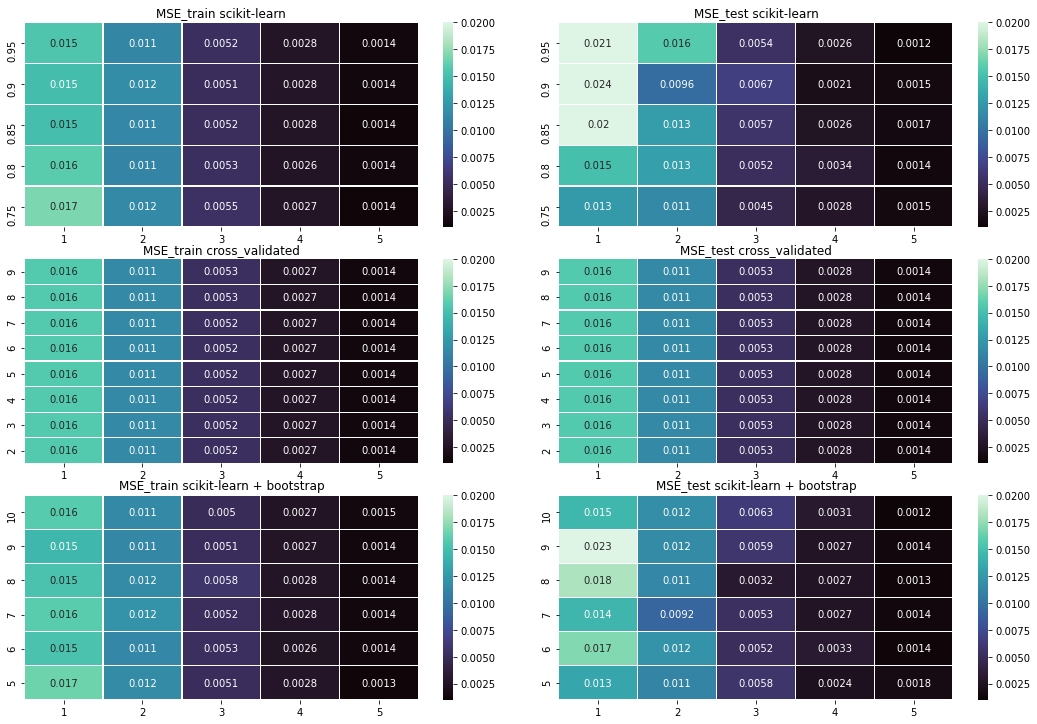

In [11]:
%matplotlib inline

fig, ax = plt.subplots(3,2,figsize=(15,10))
fig.tight_layout()

# Sklearn splitting in train9ing and testing data (without bootstrap)
create_heatmap(MSE_train_frac_df, title="MSE_train scikit-learn", axis=ax[0][0])
create_heatmap(MSE_test_frac_df, title="MSE_test scikit-learn", axis=ax[0][1])

# Cross-validated data
create_heatmap(MSE_train_cross_df, title="MSE_train cross_validated", axis=ax[1][0])
create_heatmap(MSE_test_cross_df, title="MSE_test cross_validated", axis=ax[1][1])

# Bootstrapped data
create_heatmap(MSE_train_boot_df, title="MSE_train scikit-learn + bootstrap", axis=ax[2][0])
create_heatmap(MSE_test_boot_df, title="MSE_test scikit-learn + bootstrap", axis=ax[2][1])